# EDM 2021: Early Warning Prediction in Flipped Classrooms

In [7]:
! pip install yacs

You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pickle
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from helper.hcourse import init_courses
from helper.hplotting import *

## ** Data Preparation **

In [4]:
flipped = init_courses({'types': ['flipped-classroom'], 'load': True, 'label': True})

In [5]:
courses = flipped

In [6]:
for c, course in enumerate(courses):
    print(c, course)

0 ID: EPFL-AlgebreLineaire-2018 Type: flipped-classroom Title: Algebre lineaire (classe inversee) Students: 104
1 ID: EPFL-AlgebreLineaire-2019 Type: flipped-classroom Title: Algebre lineaire (classe inversee) Students: 110
2 ID: EPFL-CS-206-2019_T1 Type: flipped-classroom Title: Parallelism and concurrency Students: 148
3 ID: EPFL-CS-210-2018_t3 Type: flipped-classroom Title: Functional programming Students: 218


In [7]:
courses = [courses[0] + courses[1], courses[2], courses[3]]

In [8]:
course = courses[2]

## ** Data Exploration ** 

#### Grades and labels analysis

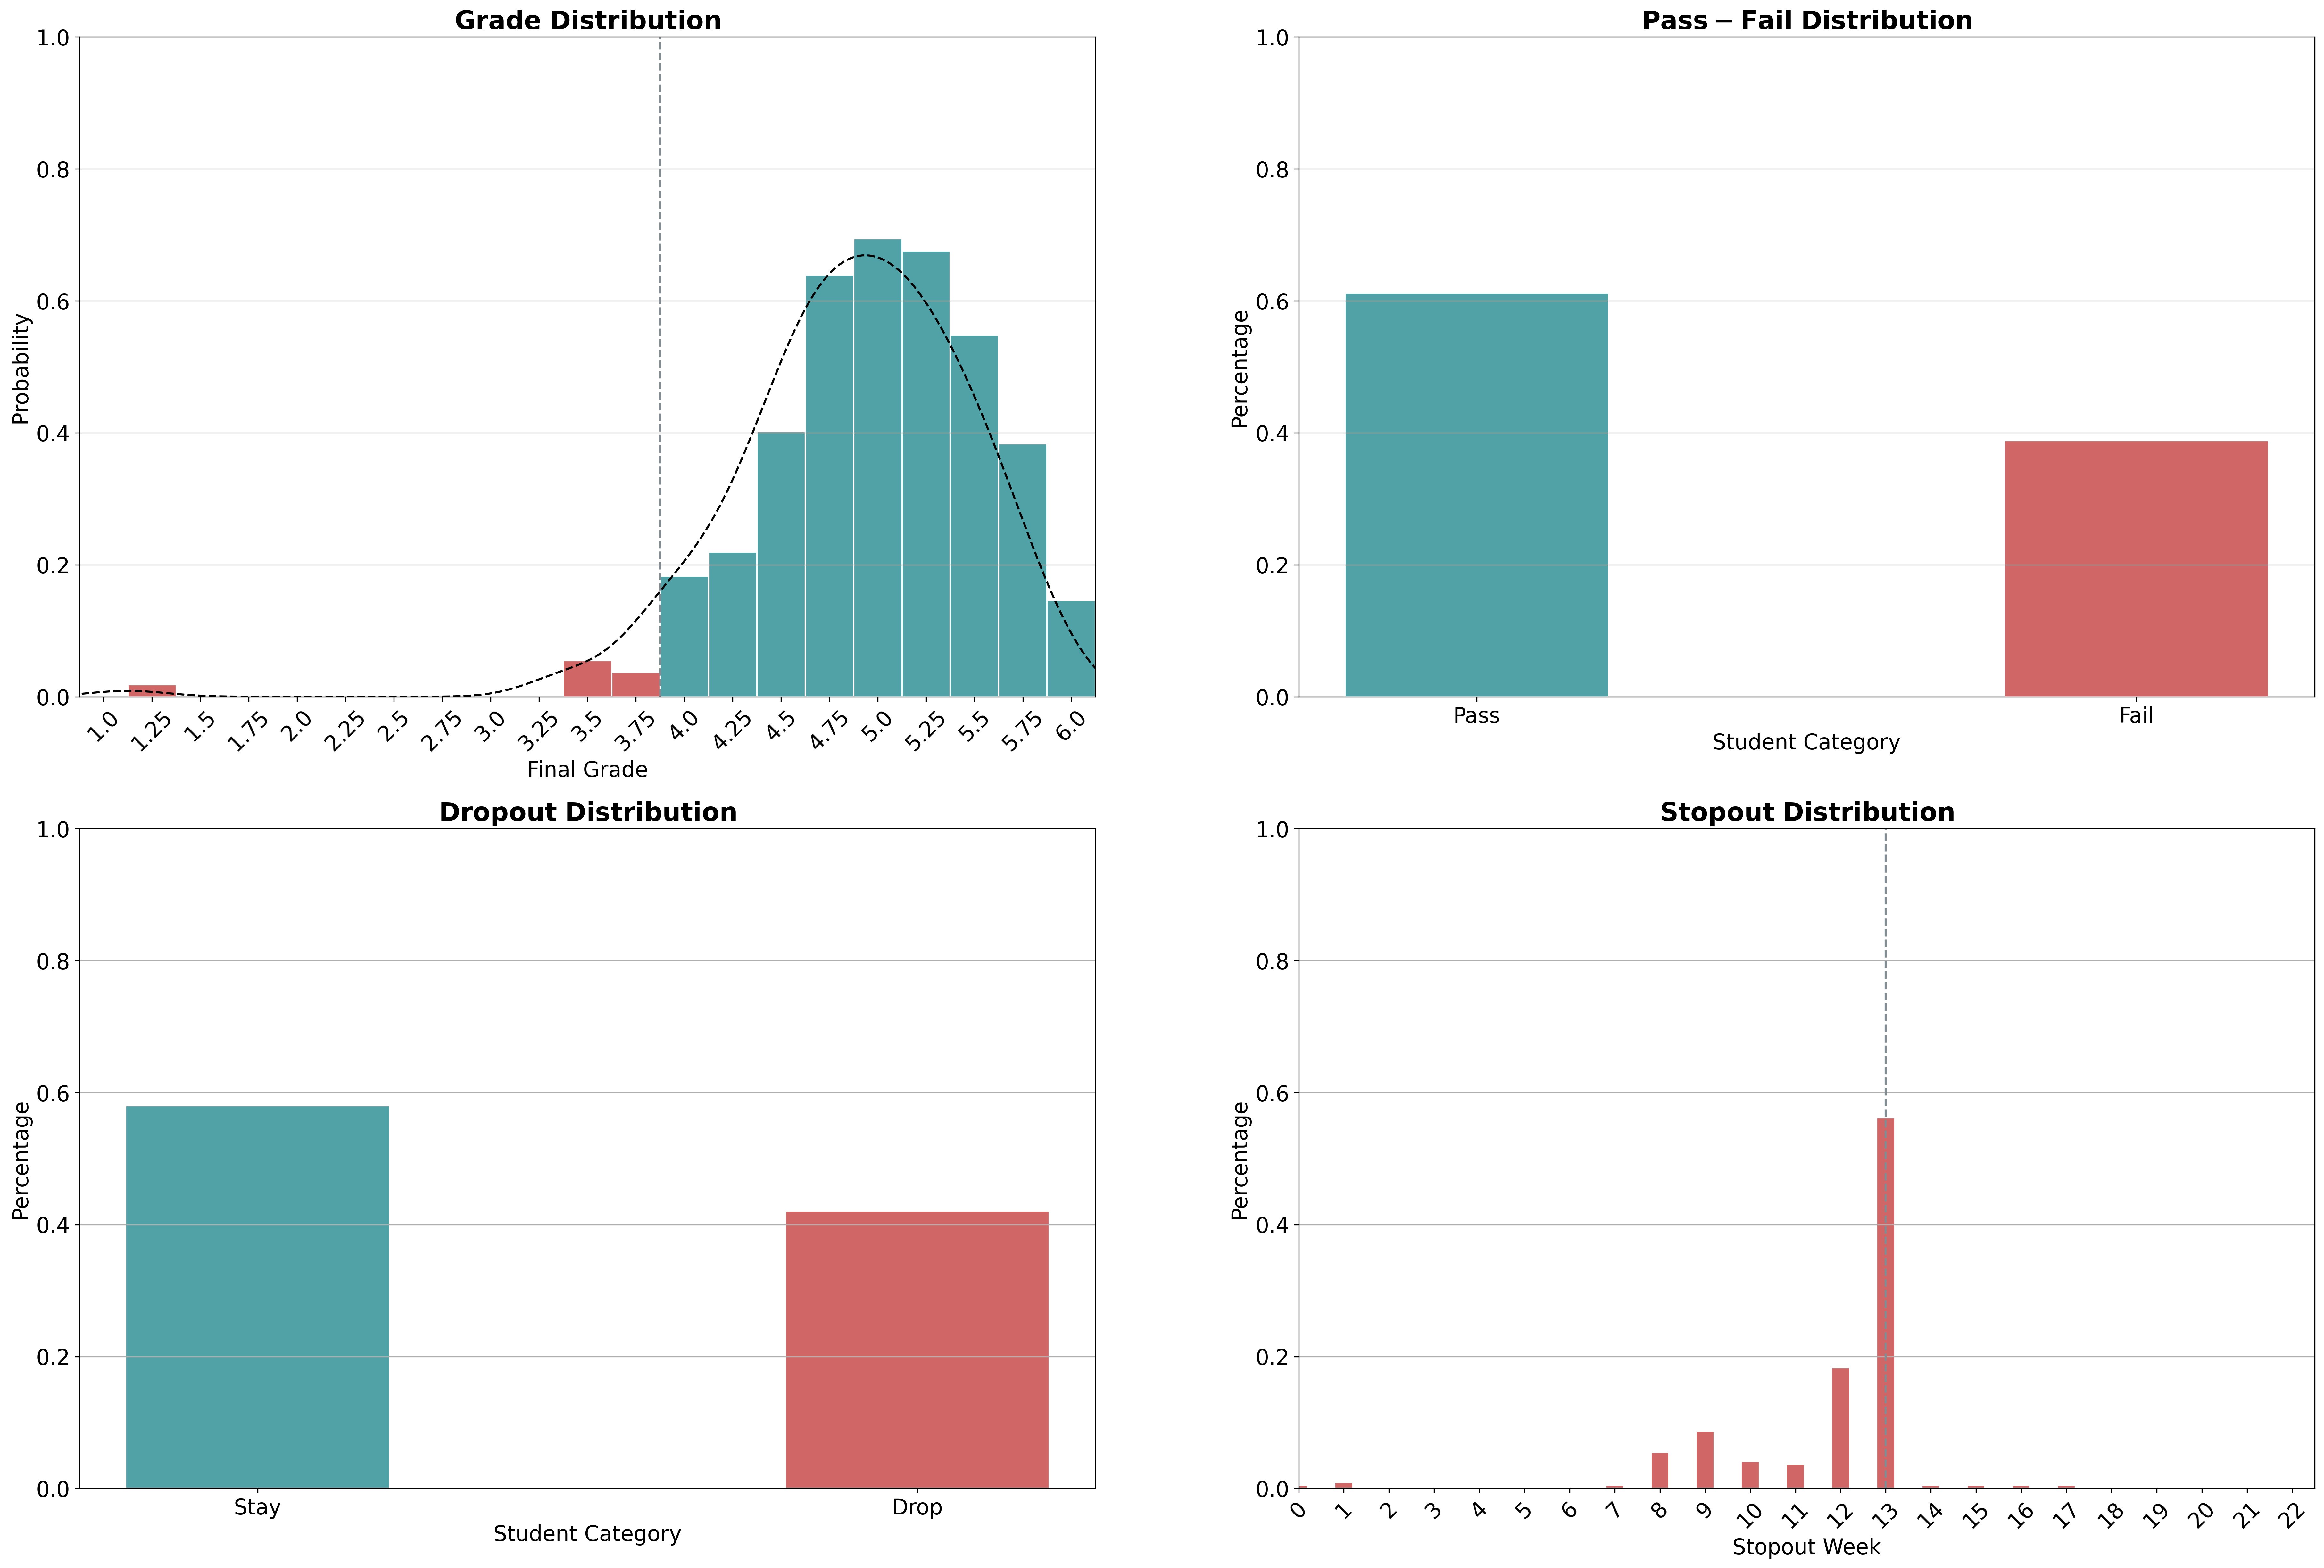

In [9]:
plt.figure(figsize=(30, 20), dpi=300)
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plot_grade_distribution(course, mingrade=1, maxgrade=6, depgrade=.25, thrgrade=4.0)

plt.subplot(2, 2, 2)
plot_pass_fail_distribution(course)

plt.subplot(2, 2, 3)
plot_dropout_distribution(course)

plt.subplot(2, 2, 4)
plot_stopout_distribution(course)

## ** Feature Exploration **

(*) The paper will include a formula for each feature

1. competency_strength: the number of submissions for problems, weighted by the corresponding grade. 
2. competency_alignment: the number of problems for that week that have been passed by the student.
3. competency_coverage: the number of problems covered by the student since the beginning of the course
4. competency_anticipation: the number of problems covered by the student from those that are in subsequent weeks than the current week. 
5. content_alignment: the number of videos for that week that have been watched by the student.
6. content_coverage: the number of videos covered by the student since the beginning of the course.
7. content_anticipation: the number of videos covered by the student from those that are in subsequent weeks.
8. student_shape: the amount of problems passed by the student at the first tentative in a row.
9. student_speed: the amount of time the student used to pass the problem, from the first tentative to the final tentative.
10. student_activeness: the number of videos the student watched in their X% entirety. 
11. student_thoughtfulness: the amount of time passed reflecting on pause during a video.
12. student_weekly_activeness: the number of weekdays the student was active. 

In [10]:
filepath = '../data/result/edm21/feature/eq_week-marras_et_al-epfl_algebrelineaire/feature_values.npz'
features = np.load(filepath)['feature_values']
filepath = '../data/result/edm21/feature/eq_week-marras_et_al-epfl_algebrelineaire/feature_labels.csv'
labels = pd.read_csv(filepath)['label-pass-fail']

In [11]:
features.shape, labels.shape

((214, 14, 12), (214,))

In [12]:
features = np.nan_to_num(features, nan=-1)

In [13]:
np.min(features[:, :, 0]), np.max(features[:, :, 0])

(-1.0, 1.0)

stat=-0.830, p=0.407
Probably the same distribution


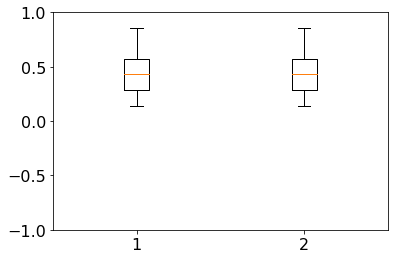

In [15]:
# Creating dataset 
np.random.seed(10) 
  
data_0 = features[labels == 0, 0, 11]
data_1 = features[labels == 1, 0, 11]
data = [data_0, data_1] 

plt.boxplot(data) 
plt.ylim([-1, 1])

from scipy.stats import ttest_ind
stat, p = ttest_ind(data_0, data_1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

## ** Experimental Evaluation ** 

### Feature Set Evaluation
- Akpinar, N. J., Ramdas, A., & Acar, U. (2020). Analyzing Student Strategies In Blended Courses Using Clickstream Data. EDM.
- Boroujeni, M. S., Sharma, K., Kidziński, Ł., Lucignano, L., & Dillenbourg, P. (2016). How to quantify student’s regularity? EC-TEL.
- Chen, F., & Cui, Y. (2020). Utilizing Student Time Series Behaviour in Learning Management Systems for Early Prediction of Course Performance. JoLA.
- He, H., Zheng, Q., Dong, B., & Yu, H. (2018). Measuring Student's Utilization of Video Resources and Its Effect on Academic Performance. ICALT. 
- Lallé, S., & Conati, C. (2020). A Data-Driven Student Model to Provide Adaptive Support During Video Watching Across MOOCs. AIED. 
- Lemay, D. J., & Doleck, T. (2020). Grade prediction of weekly assignments in MOOCS: mining video-viewing behavior. EIT. 
- Mbouzao, B., Desmarais, M. C., & Shrier, I. (2020). Early Prediction of Success in MOOC from Video Interaction Features. AIED. 
- Mubarak, A. A., Cao, H., & Ahmed, S. A. (2020). Predictive learning analytics using deep learning model in MOOCs’ courses videos. EIT. 
- Wan, H., Liu, K., Yu, Q., & Gao, X. (2019). Pedagogical Intervention Practices: Improving Learning Engagement Based on Early Prediction. IEEE TLT. 


Baseline models:
- SVM
- Random Forest
- LSTM (here or thereafter)

In [31]:
plot_feature_per_model('', 'label_pass_fail', 'epfl_algebrelineaire', 'auc', [.5, 1.], filepath='../data/result/edm21/predictor_feb17')

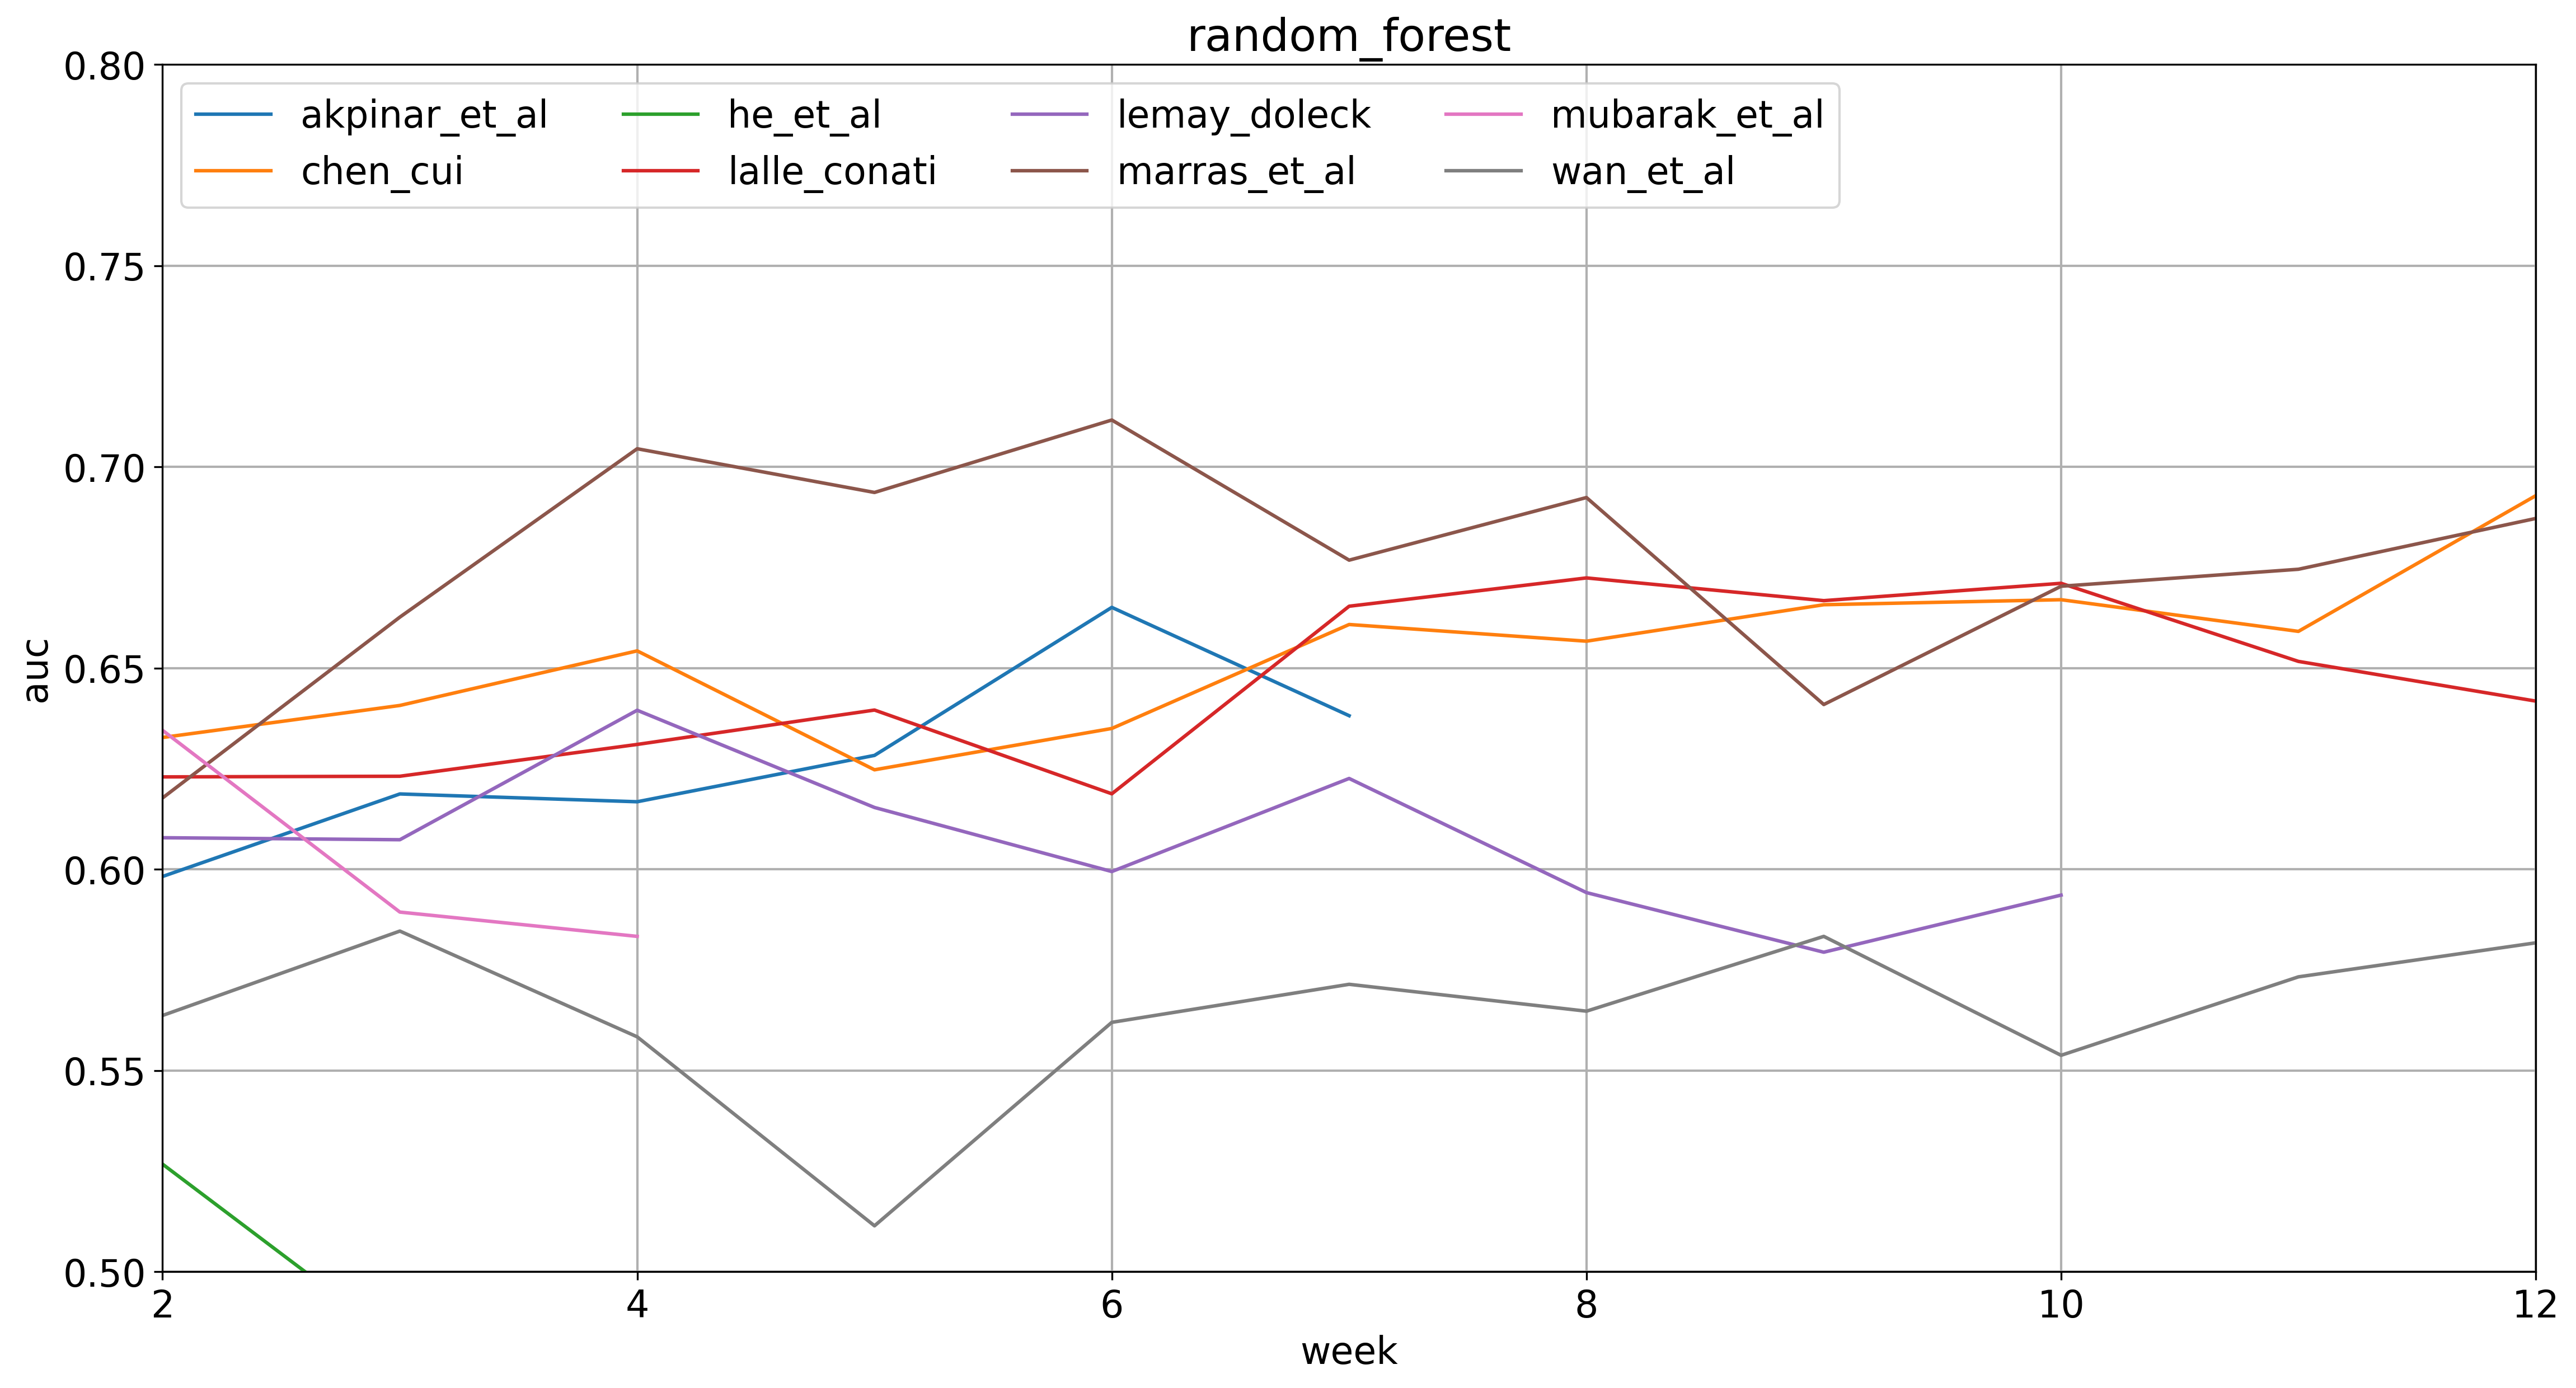

In [12]:
plot_feature_per_model('', 'label_pass_fail', 'epfl_algebrelineaire', 'auc', [.5, .8], filepath='../data/result/edm21/predictor')

In [ ]:
plot_feature_per_model('', 'label_pass_fail', 'epfl_algebrelineaire', 'auc', [.4, .8], filepath='../data/result/edm21/predictor')

In [ ]:
plot_feature_emsmble('', 'label_pass_fail', 'epfl_algebrelineaire', 'auc', [.4, .8], filepath='../data/result/edm21/predictor')

In [44]:
df_1 = pd.read_csv('../data/result/edm21/predictor/eq_week-epfl_algebrelineaire-label_pass_fail-lstm_with_attention-marras_et_al-none/stats.csv')
df_2 = pd.read_csv('../data/result/edm21/predictor/lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-marras_et_al-avg/stats.csv')

In [8]:
df_1

week  fold                                        y_train_idx  \
0       2     0  [  1   2   3   4   5   6   7   8   9  10  12  ...   
1       2     1  [  0   1   2   4   5   6   7   8   9  10  11  ...   
2       2     2  [  0   1   2   3   4   6   7   8   9  10  11  ...   
3       2     3  [  0   3   4   5   6   7   9  10  11  12  13  ...   
4       2     4  [  0   1   2   3   5   6   8   9  10  11  12  ...   
..    ...   ...                                                ...   
105    12     5  [  0   1   2   3   4   5   6   7   8   9  10  ...   
106    12     6  [  0   1   2   3   4   5   6   7   8   9  10  ...   
107    12     7  [  0   1   2   3   4   5   7   8  11  12  13  ...   
108    12     8  [  0   1   2   3   4   5   6   7   8   9  10  ...   
109    12     9  [  0   1   2   3   4   5   6   7   8   9  10  ...   

                                            y_test_idx       auc   bal_acc  \
0    [  0  11  15  17  25  42  44  51  66  70  78  ...  0.658120  0.645299   
1    [  3  18  19  21  29  35  37  45  67  90 105 1...  0.572650  0.529915   
2    [  5  38  48  53  60  62  74  88  89 112 119 1...  0.743590  0.735043   
3    [  1   2   8  23  30  43  54  83 100 102 103 1...  0.623932  0.512821   
4    [  4   7  31  36  46  56  58  61  71 108 114 1...  0.432692  0.408654   
..                                                 ...       ...       ...   
105  [ 20  49  52  65  69  73  77  87  95 101 117 1...  0.605769  0.706731   
106  [ 24  27  57  59  64  68  84  97 120 141 146 1...  0.842593  0.736111   
107  [  6   9  10  22  26  28  33  34  81  86  94  ...  0.712963  0.625000   
108  [ 12  13  16  32  40  47  75  76  80  82  96 1...  0.796296  0.777778   
109  [ 14  39  41  50  55  63  72  79  85  91  92 1...  0.601852  0.513889   

           f1  acc_fail  acc_pass      bthr  \
0    0.533333  0.444444  0.846154  0.281584   
1    0.444444  0.444444  0.615385  0.228090   
2    0.700000  0.777778  0.692308  0.553373   
3    0.375000  0.333333  0.692308  0.274143   
4    0.153846  0.125000  0.692308  0.375354   
..        ...       ...       ...       ...   
105  0.666667  0.875000  0.538462  0.508245   
106  0.666667  0.555556  0.916667  0.355840   
107  0.600000  0.666667  0.583333  0.429503   
108  0.761905  0.888889  0.666667  0.505586   
109  0.444444  0.444444  0.583333  0.101764   

                                           ypred_proba  \
0    [0.17584428 0.11179074 0.54655063 0.476353   0...   
1    [0.03603946 0.5523364  0.08375938 0.2877965  0...   
2    [0.07462642 0.602418   0.46161732 0.32931107 0...   
3    [0.27021435 0.55582726 0.64014864 0.10198598 0...   
4    [0.4247102  0.0400386  0.6179658  0.15389587 0...   
..                                                 ...   
105  [0.777931   0.68878263 0.5082447  0.73102975 0...   
106  [0.77962345 0.08700926 0.35584044 0.9365919  0...   
107  [0.1488412  0.05649135 0.8551613  0.8755178  0...   
108  [0.50558585 0.9150834  0.01580578 0.5553554  0...   
109  [0.51264966 0.2052048  0.10176395 0.15719645 0...   

                                             ypred  \
0    [0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0]   
1    [0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0]   
2    [0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0]   
3    [0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0]   
4      [0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]   
..                                             ...   
105    [1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0]   
106    [1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]   
107    [0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0]   
108    [1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0]   
109    [1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0]   

                                             ytrue  
0    [0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1]  
1    [0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0]  
2    [1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1]  
3    [0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0]  
4      [0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0] 

In [48]:
from sklearn.metrics import roc_auc_score
for week in range(2, 10):
    v = []
    for (index_1, row_1), (index_2, row_2) in zip(df_1.iterrows(), df_2.iterrows()):
        if not row_1['week'] == week:
            continue
        #print((row_1['week'], row_1['fold']), (row_2['week'], row_2['fold']))    
        y_true = np.array(row_1['ytrue'][1:-1].split()).astype(float)
        l1 = np.array(row_1['ypred_proba'][1:-1].split()).astype(float)
        l2 = np.array(row_2['ypred_proba'][1:-1].split()).astype(float)
        y_pred = np.array([np.mean([x, y]) for x, y in zip(l1, l2)])
        v.append(roc_auc_score(y_true, y_pred))
    #print(v)
    print(week, np.mean(v))

2 0.6389957264957264
3 0.6798789173789174
4 0.7025997150997151
5 0.7232193732193732
6 0.6864672364672364
7 0.7116096866096866
8 0.6976139601139602
9 0.6957621082621083


## Plots for paper

In [4]:
def plot_feature_per_model(timeframe, target, course_id, metric='f1', ylim=np.array([0.0, 1.0]), filepath='../data/result/edm21/predictor'):
    predictors = set([p.split('-')[3] for p in os.listdir(filepath) if target in p and course_id in p and not 'ensemble' in p])
    results = [p for p in os.listdir(filepath) if course_id in p and target in p and not 'ensemble' in p]

    plt.rcParams.update({'font.size': 16})
    for p_idx, predictor in enumerate(predictors):
        plt.subplot(3, 2, p_idx + 1)
        plt.title(predictor)
        for predictor_result in [predictor_result for predictor_result in results if '-' + predictor + '-' in predictor_result]:
            data_with_folds = pd.read_csv(os.path.join(filepath, predictor_result, 'stats.csv'))[['week', 'fold', metric]]
            data_per_fold = data_with_folds.groupby(by='week').mean(metric)
            plt.plot(data_per_fold.index, data_per_fold[metric], label=predictor_result.split('-')[4])
            plt.xlim([data_per_fold.index.min(), data_per_fold.index.max()])
            plt.ylabel(metric)
            plt.xlabel('week')
            plt.ylim(ylim)
            plt.grid(linewidth=1)
        plt.legend(loc='upper left', ncol=4)
    plt.tight_layout()
    plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


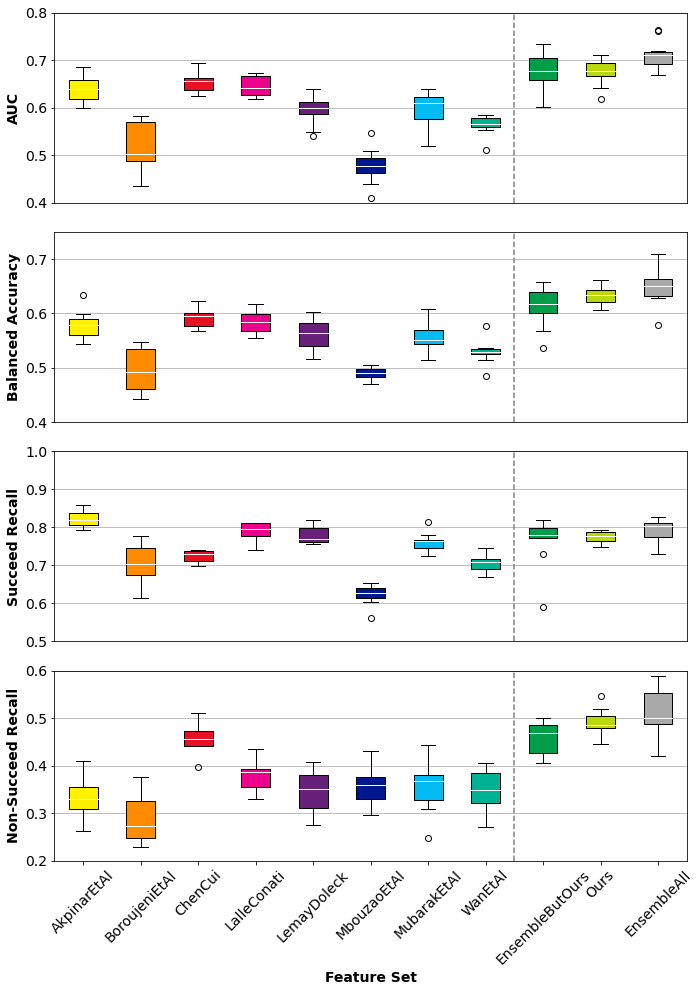

In [5]:
timeframe = ''
target = 'label_pass_fail'
course_id = 'epfl_algebrelineaire'
metric = 'auc'
ylim = [.4, .8]
filepath = '../data/result/edm21/predictor'

predictors = set([p.split('-')[3] for p in os.listdir(filepath) if target in p and course_id in p])
results = [p for p in os.listdir(filepath) if course_id in p and target in p]

new_results, tmp_results = [], []

for r in results:
    if not 'ensemble' in r and not 'marras' in r:
        new_results.append(r)
    else:
        tmp_results.append(r)
results = new_results + ['lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_but_marras-avg', 
                         'lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-marras_et_al-avg',
                         'lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_all-avg']

colors = ['#fff100','#ff8c00','#e81123','#ec008c','#68217a','#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#a9a9a9']

plt.figure(figsize=(10, 14))
font = {'family' : 'normal', 'size': 14} 
plt.rc('font', **font)

color_mapping = {}

plt.subplot(4, 1, 2)
metric = 'bal_acc'
title = 'Balanced Accuracy'
data = []
labels = []
for p_idx, predictor in enumerate(predictors):
    for predictor_result in [predictor_result for predictor_result in results if '-' + predictor + '-' in predictor_result]:
        if 'he_' in predictor_result:
            continue
        data_with_folds = pd.read_csv(os.path.join(filepath, predictor_result, 'stats.csv'))[['week', 'fold', metric]]
        if 'ensemble_but_marras' in predictor_result:
            predictor_result = predictor_result.replace('ensemble_but_marras', 'ensemble_but_ours')
        if 'marras_et_al' in predictor_result:
            predictor_result = predictor_result.replace('marras_et_al', 'ours')
        data_per_fold = data_with_folds.groupby(by='week').mean(metric)
        data.append(data_per_fold[metric].values)
        labels.append(predictor_result.split('-')[4].title().replace('_', ''))
bplot1 = plt.boxplot(data, patch_artist=True, medianprops=dict(color='white'))
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
plt.axvline(x=8.5, linestyle='--', color='grey')
plt.xticks([])
plt.ylim([.4, .75])
plt.ylabel(title, fontweight='bold')
plt.grid(axis='y')

plt.subplot(4, 1, 3)
metric = 'acc_pass'
title = 'Succeed Recall'
data = []
labels = []
for p_idx, predictor in enumerate(predictors):
    for predictor_result in [predictor_result for predictor_result in results if '-' + predictor + '-' in predictor_result]:
        if 'he_' in predictor_result:
            continue
        data_with_folds = pd.read_csv(os.path.join(filepath, predictor_result, 'stats.csv'))[['week', 'fold', metric]]
        if 'ensemble_but_marras' in predictor_result:
            predictor_result = predictor_result.replace('ensemble_but_marras', 'ensemble_but_ours')
        if 'marras_et_al' in predictor_result:
            predictor_result = predictor_result.replace('marras_et_al', 'ours')
        data_per_fold = data_with_folds.groupby(by='week').mean(metric)
        data.append(data_per_fold[metric].values)
        labels.append(predictor_result.split('-')[4].title().replace('_', ''))
bplot1 = plt.boxplot(data, patch_artist=True, medianprops=dict(color='white'))
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
plt.axvline(x=8.5, linestyle='--', color='grey')
plt.xticks([])
plt.ylim([.5, 1.])
plt.ylabel(title, fontweight='bold')
plt.grid(axis='y')

plt.subplot(4, 1, 4)
metric = 'acc_fail'
title = 'Non-Succeed Recall'
data = []
labels = []
counter = 0
for p_idx, predictor in enumerate(predictors):
    for predictor_result in [predictor_result for predictor_result in results if '-' + predictor + '-' in predictor_result]:
        if 'he_' in predictor_result:
            continue
        data_with_folds = pd.read_csv(os.path.join(filepath, predictor_result, 'stats.csv'))[['week', 'fold', metric]]
        if 'ensemble_but_marras' in predictor_result:
            predictor_result = predictor_result.replace('ensemble_but_marras', 'ensemble_but_ours')
        if 'marras_et_al' in predictor_result:
            predictor_result = predictor_result.replace('marras_et_al', 'ours')
        data_per_fold = data_with_folds.groupby(by='week').mean(metric)
        data.append(data_per_fold[metric].values)
        color_mapping[predictor_result.split('-')[4]] = colors[counter]
        counter += 1
        labels.append(predictor_result.split('-')[4].title().replace('_', ''))
bplot1 = plt.boxplot(data, patch_artist=True, medianprops=dict(color='white'))
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
plt.axvline(x=8.5, linestyle='--', color='grey')
plt.xticks(np.arange(len(labels)) + 1, labels, rotation=45)
plt.ylim([.2, .6])
plt.xlabel('Feature Set', fontweight='bold')
plt.ylabel(title, fontweight='bold')
plt.grid(axis='y')

plt.subplot(4, 1, 1)
metric = 'auc'
title = 'AUC'
data = []
labels = []
counter = 0
for p_idx, predictor in enumerate(predictors):
    for predictor_result in [predictor_result for predictor_result in results if '-' + predictor + '-' in predictor_result]:
        if 'he_' in predictor_result:
            continue
        data_with_folds = pd.read_csv(os.path.join(filepath, predictor_result, 'stats.csv'))[['week', 'fold', metric]]
        if 'ensemble_but_marras' in predictor_result:
            predictor_result = predictor_result.replace('ensemble_but_marras', 'ensemble_but_ours')
        if 'marras_et_al' in predictor_result:
            predictor_result = predictor_result.replace('marras_et_al', 'ours')
        data_per_fold = data_with_folds.groupby(by='week').mean(metric)
        data.append(data_per_fold[metric].values)
        color_mapping[predictor_result.split('-')[4]] = colors[counter]
        counter += 1
        labels.append(predictor_result.split('-')[4].title().replace('_', ''))
bplot1 = plt.boxplot(data, patch_artist=True, medianprops=dict(color='white'))
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
plt.axvline(x=8.5, linestyle='--', color='grey')
plt.xticks([])
plt.ylim([.4, .8])
plt.ylabel(title, fontweight='bold')
plt.grid(axis='y')

plt.tight_layout()

plt.savefig('lflip_boxplots.png', dpi=300)

plt.show()

2 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_all-avg 10
2 lq_week-epfl_cs_210_2018_t3-label_pass_fail-random_forest-ensemble_all-avg 10
2 lq_week-epflx_algebre2x-label_pass_fail-random_forest-ensemble_all-avg 10
2 lq_week-progfun_005-label_pass_fail-random_forest-ensemble_all-avg 10
[1 2 3]
1 0
3 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_all-avg 10
3 lq_week-epfl_cs_210_2018_t3-label_pass_fail-random_forest-ensemble_all-avg 10
3 lq_week-epflx_algebre2x-label_pass_fail-random_forest-ensemble_all-avg 10
3 lq_week-progfun_005-label_pass_fail-random_forest-ensemble_all-avg 10
[10 11 12]
7 1
4 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_all-avg 10
4 lq_week-epfl_cs_210_2018_t3-label_pass_fail-random_forest-ensemble_all-avg 10
4 lq_week-epflx_algebre2x-label_pass_fail-random_forest-ensemble_all-avg 10
4 lq_week-progfun_005-label_pass_fail-random_forest-ensemble_all-avg 10
[19 20 21]
13 2
5 lq_week-epfl_algebrelineaire

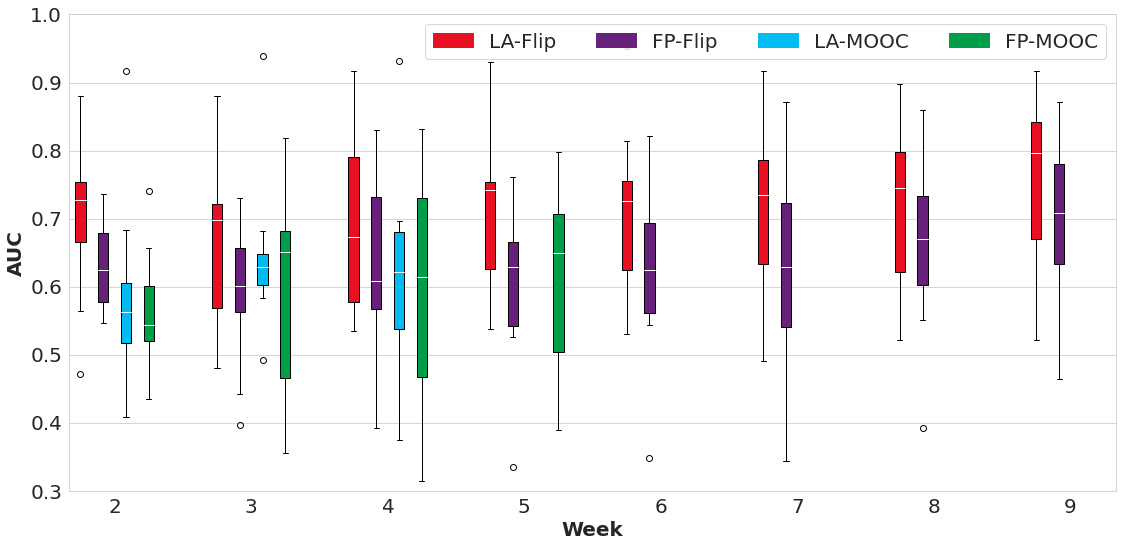

In [302]:
target = 'label_pass_fail'
metric = 'auc'
ylim = [.4, .8]
filepath = '../data/result/edm21/predictor'

selected = ['lalle', 'chen', 'akpinar', 'marras', 'ensemble']

predictors = set([p.split('-')[3] for p in os.listdir(filepath) if target in p and course_id in p])
results = [p for p in os.listdir(filepath) if course_id in p and target in p and course_id in p]

results = ['lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_all-avg',
           'lq_week-epfl_cs_210_2018_t3-label_pass_fail-random_forest-ensemble_all-avg',
           'lq_week-epflx_algebre2x-label_pass_fail-random_forest-ensemble_all-avg',
           'lq_week-progfun_005-label_pass_fail-random_forest-ensemble_all-avg']

colors = ['#fff100','#ff8c00','#e81123','#ec008c','#68217a','#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#a9a9a9'][::2][1:5]

plt.figure(figsize=(16, 8))
font = {'family' : 'normal', 'size': 20} 
plt.rc('font', **font)

vectors = {}

def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color=colors[0])
    plt.setp(bp['boxes'][1], color=colors[1])
    plt.setp(bp['boxes'][2], color=colors[2])
    plt.setp(bp['boxes'][3], color=colors[3])

X = np.arange(10)
data = []
counter = 0

number = 4
labels = ['LA-Flip', 'FP-Flip', 'LA-MOOC', 'FP-MOOC']
starting = 1
counter = 0
for week in range(2, 10):
    data_1 = []
    for idx, result in enumerate(results):
        data_with_folds = pd.read_csv(os.path.join(filepath, result, 'stats.csv'))[['week', 'fold', 'auc']]
        if week > len(np.unique(data_with_folds['week'])) + 1:
            a = np.zeros(10)
        else:
            a = data_with_folds[data_with_folds['week'] == week]['auc'].values
        print(week, result, len(a)) 
        if 'prog' in result:
            data_1.append(a + 0.05)
        else:
            data_1.append(a)
    positions = np.arange(starting + (counter*3), (starting + (counter*3) + 3))
    print(positions)
    print(starting, counter)
    bplot1 = plt.boxplot(data_1, positions=np.arange(starting, starting + number), patch_artist=True, medianprops=dict(color='white'))
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
    starting += 6
    counter += 1
patch = []
for idx, key in enumerate(labels):
    patch.append(mpatches.Patch(color=colors[idx], label=key))
plt.legend(handles=patch, ncol=4)
plt.xticks(np.arange(2.5, 46, 6), np.arange(2, 10))
plt.ylim([.3, 1.])
plt.ylabel('AUC', fontweight='bold')
plt.xlabel('Week', fontweight='bold')
plt.tight_layout()
plt.grid(axis='x')
plt.savefig('three_course_boxplot.png', dpi=300)
plt.show()

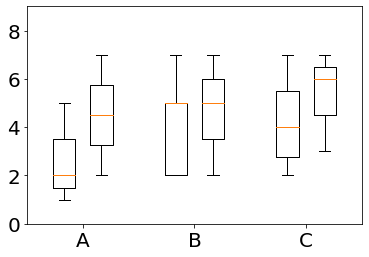

In [165]:
def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['fliers'][0], color='blue')
    setp(bp['fliers'][1], color='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['fliers'][2], color='red')
    setp(bp['fliers'][3], color='red')
    setp(bp['medians'][1], color='red')

# Some fake data to plot
A = [[1, 2, 5,],  [7, 2]]
B = [[5, 7, 2, 2, 5], [7, 2, 5]]
C = [[3,2,5,7], [6, 7, 3]]

fig = plt.figure()
ax = plt.axes()

# first boxplot pair
bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)

# second boxplot pair
bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)

# thrid boxplot pair
bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)

# set axes limits and labels
plt.xlim(0,9)
plt.ylim(0,9)
plt.xticks([1.5, 4.5, 7.5], ['A', 'B', 'C'])

plt.show()

array([123,   0,   0,   0,   0,   0,   0,   0,   0,   0])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


0 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-akpinar_et_al-avg
0 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-akpinar_et_al-avg
1 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-boroujeni_et_al-avg
2 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-chen_cui-avg
2 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-chen_cui-avg
3 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-he_et_al-avg
3 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-lalle_conati-avg
3 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-lalle_conati-avg
4 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-lemay_doleck-avg
5 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-mbouzao_et_al-avg
6 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-mubarak_et_al-avg
7 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-wan_et_al-avg
8 lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_bu

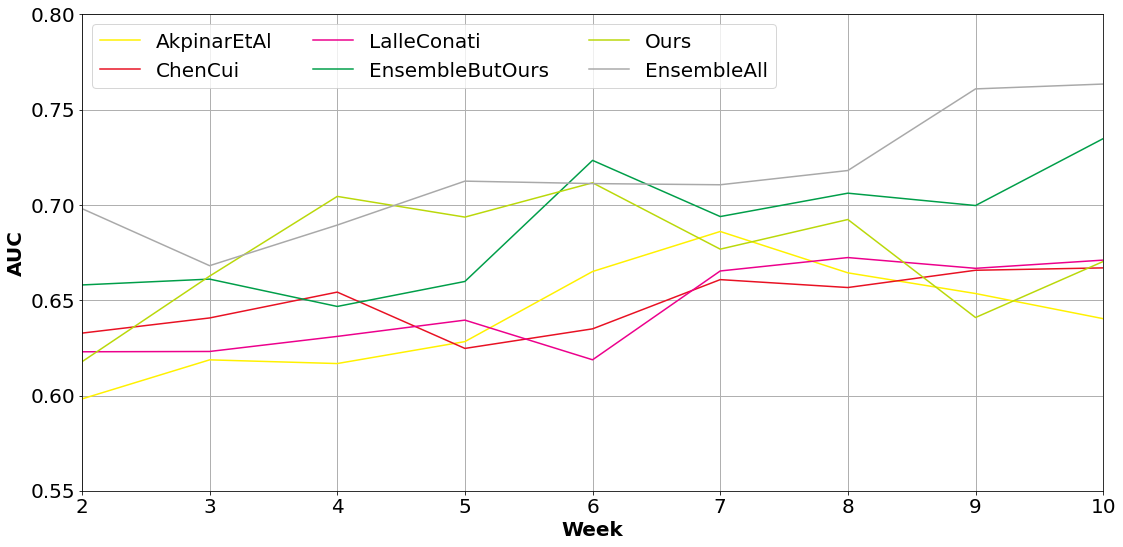

In [6]:
timeframe = ''
target = 'label_pass_fail'
course_id = 'epfl_algebrelineaire'
metric = 'auc'
ylim = [.4, .8]
filepath = '../data/result/edm21/predictor'

selected = ['lalle', 'chen', 'akpinar', 'marras', 'ensemble']

predictors = set([p.split('-')[3] for p in os.listdir(filepath) if target in p and course_id in p])
results = [p for p in os.listdir(filepath) if course_id in p and target in p]

new_results, tmp_results = [], []

for r in results:
    if not 'ensemble' in r and not 'marras' in r:
        new_results.append(r)
    else:
        tmp_results.append(r)
results = new_results + ['lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_but_marras-avg', 
                         'lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-marras_et_al-avg',
                         'lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_all-avg']

colors = ['#fff100','#ff8c00','#e81123','#ec008c','#68217a','#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#a9a9a9']

plt.figure(figsize=(16, 8))
font = {'family' : 'normal', 'size': 20} 
plt.rc('font', **font)

for p_idx, predictor in enumerate(predictors):
    counter = 0
    for r_idx, predictor_result in enumerate([predictor_result for predictor_result in results if '-' + predictor + '-' in predictor_result]):
        print(counter, predictor_result)
        if 'he_' in predictor_result:
            continue
        if len([1 for s in selected if s in predictor_result]) == 0:
            counter += 1
            continue
        data_with_folds = pd.read_csv(os.path.join(filepath, predictor_result, 'stats.csv'))[['week', 'fold', metric]]
        if 'ensemble_but_marras' in predictor_result:
            predictor_result = predictor_result.replace('ensemble_but_marras', 'ensemble_but_ours')
        if 'marras_et_al' in predictor_result:
            predictor_result = predictor_result.replace('marras_et_al', 'ours')
        data_per_fold = data_with_folds.groupby(by='week').mean(metric)
        print(counter, predictor_result)
        plt.plot(data_per_fold.index[:10], data_per_fold[metric][:10], color=colors[counter], label=predictor_result.split('-')[4].title().replace('_', ''))
        plt.xlim([data_per_fold.index.min(), data_per_fold.index.max()])
        plt.ylabel(metric)
        plt.xlabel('week')
        plt.ylim(ylim)
        plt.grid(linewidth=1)       
        counter += 1
    plt.legend(loc='upper left', ncol=3)
    plt.xticks(2 + np.arange(len(data_per_fold)))
    plt.xlim(2, 10)
    plt.ylim(.55, .80)
    plt.ylabel('AUC', fontweight='bold')
    plt.xlabel('Week', fontweight='bold')
plt.tight_layout()
plt.savefig('lflip_lineplot.png', dpi=300)
plt.show()

In [309]:
import json
filepath = '../data/result/edm21/feature/lq_week-ensemble_all-epfl_algebrelineaire/feature_selected.txt'
with open(filepath, 'rb') as file:
    selection = json.load(file)

nam = np.array(selection['feature_names'])[np.array(selection['support']) > 0]
imp = np.array(selection['importance'])[np.array(selection['support']) > 0]

for n, i in zip(nam, imp):
    print(n, i)

akpinar_et_al-video.play-video.pause-video.load 0.011312578938062347
akpinar_et_al-video.stop-problem.check-video.load 0.010350024406752558
akpinar_et_al-problem.check-problem.check-video.load 0.010532184666744571
boroujeni_et_al-RegWeeklySim-m1 0.012233751695882304
boroujeni_et_al-RegWeeklySim-m2 0.020996898846229774
boroujeni_et_al-RegPeriodicity-m3 0.00929947846818815
chen_cui-RatioClicksWeekendDay 0.03819757074502426
lalle_conati-WeeklyProp-watched-mean 0.021643172247982033
lalle_conati-WeeklyProp-replayed-mean 0.013732161245023966
lalle_conati-WeeklyProp-interrupted-mean 0.009861171774689075
lalle_conati-WeeklyProp-interrupted-std 0.009564091238149535
lalle_conati-FrequencyEvent-video.play 0.009321403963789054
marras_et_al-CompetencyStrength 0.0921363901335272
marras_et_al-CompetencyAnticipation 0.03698071318864471
marras_et_al-ContentAnticipation 0.030580407486285665
marras_et_al-StudentShape 0.01479215134453761
wan_et_al-NumberSubmissions-avg 0.011757394146439875
wan_et_al-Numbe

In [310]:
filepath = '../data/result/edm21/predictor/lq_week-epfl_algebrelineaire-label_pass_fail-random_forest-ensemble_all-avg/stats.csv'
df = pd.read_csv(filepath)

importance_matrix = []
for week, week_group in df.groupby(by='week'):
    importance = []
    for row_id, row in week_group.iterrows():
        imp = np.array(row['feature_importance'][1:-1].split()).astype(float)
        importance.append(imp)
    importance = np.mean(importance, axis=0)
    importance_matrix.append(importance)
importance_matrix = np.array(importance_matrix)
importance_matrix = importance_matrix.T

In [311]:
importance_matrix.shape

(19, 10)

In [312]:
np.mean(importance_matrix, axis=1)

array([0.04218246, 0.0369498 , 0.04292089, 0.04195636, 0.05631675,
       0.04203992, 0.06983858, 0.07183949, 0.04551657, 0.04919576,
       0.05374075, 0.04530698, 0.06040181, 0.07790383, 0.06397697,
       0.0484348 , 0.05117683, 0.04676156, 0.05353988])

In [313]:
idx = np.argsort(np.mean(importance_matrix, axis=1))[::-1]
print('before', nam)
nam = nam[idx]
print('after', nam)
importance_matrix = importance_matrix[idx]
mapper = ['$f_{' + str(i) + '}$'  for i, x in enumerate(nam)]

for n, i in zip(nam, importance_matrix):
    print(n, i)

before ['akpinar_et_al-video.play-video.pause-video.load'
 'akpinar_et_al-video.stop-problem.check-video.load'
 'akpinar_et_al-problem.check-problem.check-video.load'
 'boroujeni_et_al-RegWeeklySim-m1' 'boroujeni_et_al-RegWeeklySim-m2'
 'boroujeni_et_al-RegPeriodicity-m3' 'chen_cui-RatioClicksWeekendDay'
 'lalle_conati-WeeklyProp-watched-mean'
 'lalle_conati-WeeklyProp-replayed-mean'
 'lalle_conati-WeeklyProp-interrupted-mean'
 'lalle_conati-WeeklyProp-interrupted-std'
 'lalle_conati-FrequencyEvent-video.play'
 'marras_et_al-CompetencyStrength' 'marras_et_al-CompetencyAnticipation'
 'marras_et_al-ContentAnticipation' 'marras_et_al-StudentShape'
 'wan_et_al-NumberSubmissions-avg'
 'wan_et_al-NumberSubmissions-perc_correct'
 'wan_et_al-NumberSubmissions-correct']
after ['marras_et_al-CompetencyAnticipation'
 'lalle_conati-WeeklyProp-watched-mean' 'chen_cui-RatioClicksWeekendDay'
 'marras_et_al-ContentAnticipation' 'marras_et_al-CompetencyStrength'
 'boroujeni_et_al-RegWeeklySim-m2'
 'lal

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


$f_{0}$ : MarrasEtAl-CompetencyAnticipation
$f_{1}$ : LalleConati-WeeklyProp-watched-mean
$f_{2}$ : ChenCui-RatioClicksWeekendDay
$f_{3}$ : MarrasEtAl-ContentAnticipation
$f_{4}$ : MarrasEtAl-CompetencyStrength
$f_{5}$ : BoroujeniEtAl-RegWeeklySim-m2
$f_{6}$ : LalleConati-WeeklyProp-interrupted-std
$f_{7}$ : WanEtAl-NumberSubmissions-correct
$f_{8}$ : WanEtAl-NumberSubmissions-avg

$f_{10}$ : MarrasEtAl-StudentShape
$f_{11}$ : WanEtAl-NumberSubmissions-perc_correct
$f_{12}$ : LalleConati-WeeklyProp-replayed-mean
$f_{13}$ : LalleConati-FrequencyEvent-video.play
$f_{14}$ : AkpinarEtAl-problem.check-problem.check-video.load
$f_{15}$ : AkpinarEtAl-video.play-video.pause-video.load
$f_{16}$ : BoroujeniEtAl-RegPeriodicity-m3
$f_{17}$ : BoroujeniEtAl-RegWeeklySim-m1
$f_{18}$ : AkpinarEtAl-video.stop-problem.check-video.load



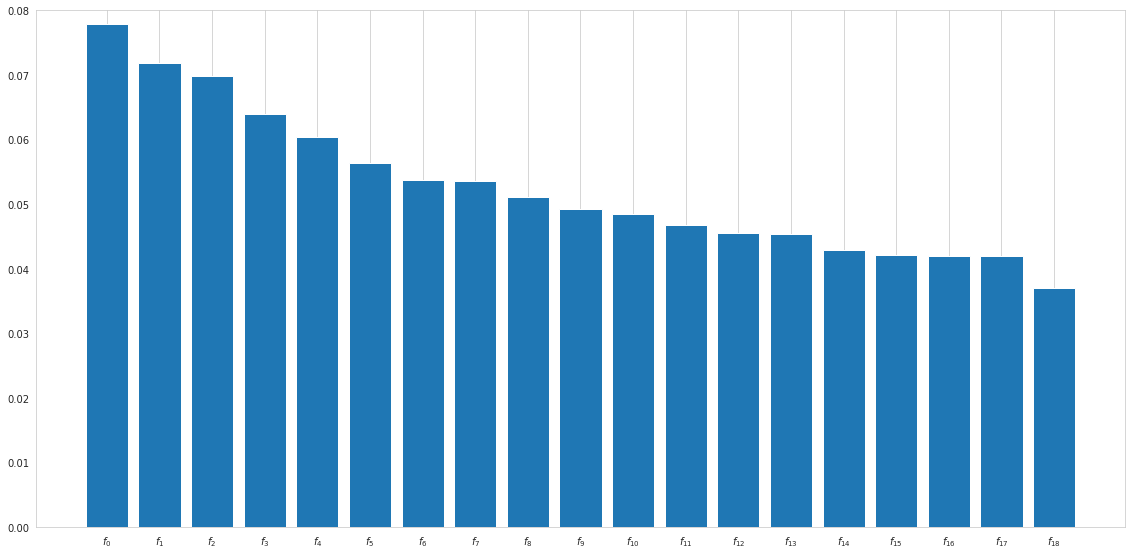

In [314]:
plt.figure(figsize=(16, 8))
font = {'family' : 'normal', 'size': 10} 
plt.rc('font', **font)

height = np.mean(importance_matrix, axis=1)
bars = mapper
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.ylim(0, .08)
plt.grid(axis='y')

font = {'family' : 'normal', 'size': 16} 
plt.rc('font', **font)
l1 = ''
for i, (n, m) in enumerate(zip(nam, mapper)):
    if i == len(nam) // 2:
        break
    l1 += m + ' : ' + '-'.join([n.split('-')[0].title().replace('_', '')] + n.split('-')[1:]) + '\n'
print(l1)

l1 = ''
for i, (n, m) in enumerate(zip(nam, mapper)):
    if i <= len(nam) // 2:
        continue
    l1 += m + ' : ' + '-'.join([n.split('-')[0].title().replace('_', '')] + n.split('-')[1:]) + '\n'
print(l1)

plt.tight_layout()
plt.savefig('lflip_barplots.png', dpi=300)
plt.show()

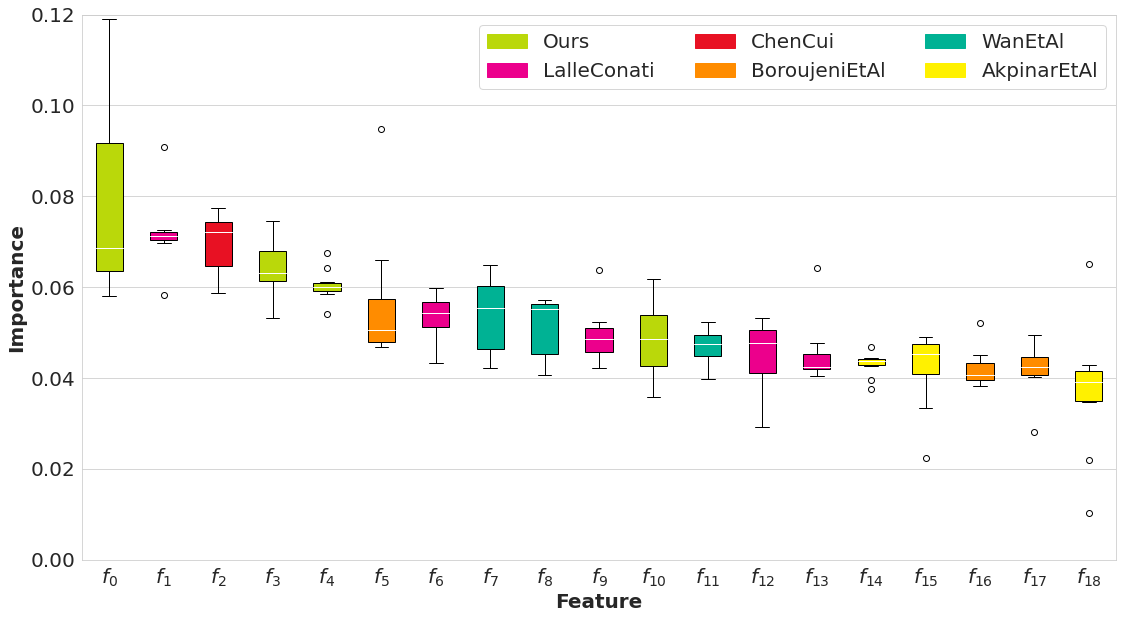

In [332]:
import matplotlib.patches as mpatches

plt.figure(figsize=(16, 9))
font = {'family' : 'normal', 'size': 20} 
plt.rc('font', **font)

height = importance_matrix
bars = mapper

data = []
labels = []
l = {}
for i, (feature_val, name, long_name) in enumerate(zip(height, mapper, nam)):
    data.append(feature_val)
    labels.append(name)
    
bplot1 = plt.boxplot(data, patch_artist=True, medianprops=dict(color='white'))

for patch, n in zip(bplot1['boxes'], nam):
    color_mapping['marras_et_al'] = color_mapping['ours']
    l[n.split('-')[0].title().replace('_', '')] = color_mapping[n.split('-')[0]]
    patch.set_facecolor(color_mapping[n.split('-')[0]])

plt.xticks(np.arange(len(labels)) + 1, labels)
plt.ylim([.0, .12])
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')

patch = []
for key, val in l.items():
    if 'MarrasEtAl' in key:
        key = 'Ours'
    patch.append(mpatches.Patch(color=val, label=key))
plt.legend(handles=patch, ncol=3)

plt.tight_layout()
plt.savefig('lflip_boxplots_features.png', dpi=300)
plt.grid(axis='x')

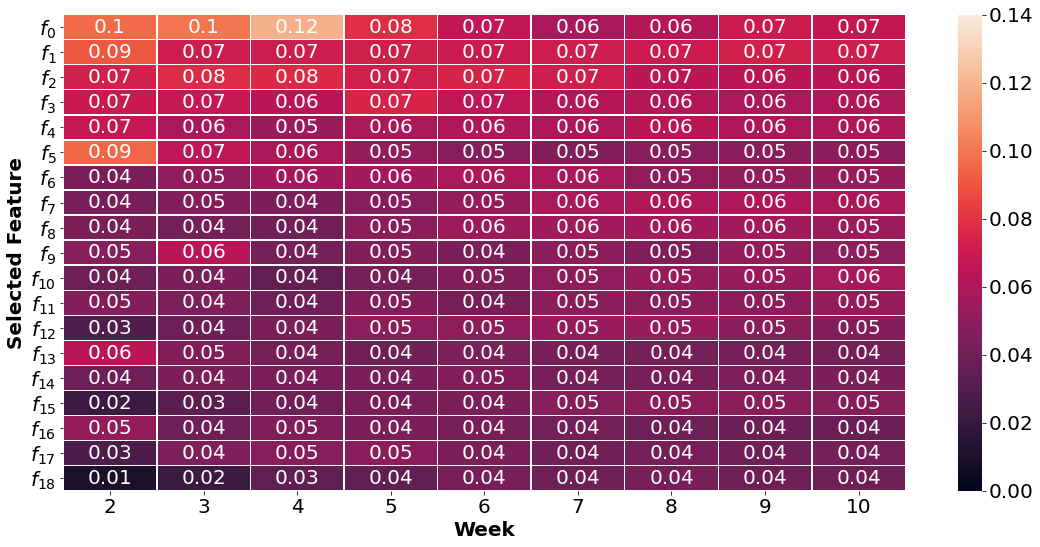

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize=(16, 8))
font = {'family' : 'normal', 'size': 20} 
plt.rc('font', **font)

importance_matrix = importance_matrix[:, :-1]

sns.heatmap(importance_matrix, linewidth=0.5, vmin=0, vmax=0.14)
plt.yticks(np.arange(len(nam)) + 0.5, mapper, rotation=0)
plt.xticks(np.arange(importance_matrix.shape[1]) + 0.5, np.arange(importance_matrix.shape[1]) + 2, rotation=0)
plt.xlabel('Week', fontweight='bold')
plt.ylabel('Selected Feature', fontweight='bold')

for i in range(importance_matrix.shape[0]):
    for j in range(importance_matrix.shape[1]):
        text = plt.text(j + 0.5, i + 0.5, round(importance_matrix[i, j], 2), ha="center", va="center", color="w")
        
plt.tight_layout()
plt.savefig('lflip_heatmap_features.png', dpi=300)
plt.show()